Load Julia packages (libraries) needed  for the snippets in chapter 0

In [1]:
using StatisticalRethinking, CmdStan, StanMCMCChain
gr(size=(500,500));

CmdStan uses a tmp directory to store the output of cmdstan

In [2]:
ProjDir = rel_path("..", "scripts", "04")
cd(ProjDir)

CmdStan uses a tmp directory to store the output of cmdstan

In [3]:
ProjDir = rel_path("..", "scripts", "04")
cd(ProjDir)

In [4]:
howell1 = CSV.read(rel_path("..", "data", "Howell1.csv"), delim=';')
df = convert(DataFrame, howell1);
df2 = filter(row -> row[:age] >= 18, df);
first(df2, 5)

,height,weight,age,male
,Float64⍰,Float64⍰,Float64⍰,Int64⍰
1,151.765,47.8256,63.0,1
2,139.7,36.4858,63.0,0
3,136.525,31.8648,65.0,0
4,156.845,53.0419,41.0,1
5,145.415,41.2769,51.0,0


### Snippet 4.21

Sample 20 random heights

In [5]:
n = size(df2, 1)
selected_ind = sample(1:n, 20, replace=false);
df3 = df2[selected_ind, :];

### Snippet 4.22

Generate approximate probabilities

In [6]:
struct Post
  mu::Float64
  sigma::Float64
  ll:: Float64
  prod::Float64
  prob::Float64
end

mu_list = repeat(range(140, 170, length=200), 200);
sigma_list = repeat(range(4, 20, length=200), inner=200);

ll = zeros(40000);
for i in 1:40000
    d1 = Normal(mu_list[i], sigma_list[i])
    ll[i] = sum(log.(pdf.(d1, df3[:height])))
end

d2 = Normal(178.0, 20.0)
d3 = Uniform(0, 50)
prod = ll + log.(pdf.(d2, mu_list)) + log.(pdf.(d3, sigma_list))
prob = exp.(prod .- maximum(prod))
post = DataFrame(mu=mu_list, sigma=sigma_list, ll=ll, prod=prod, prob=prob)
first(post, 10)

,mu,sigma,ll,prod,prob
,Float64,Float64,Float64,Float64,Float64
1,140.0,4.0,-200.076,-209.708,5.13405e-58
2,140.151,4.0,-197.514,-207.132,6.75001e-57
3,140.302,4.0,-194.981,-204.584,8.62556e-56
4,140.452,4.0,-192.476,-202.065,1.07129e-54
5,140.603,4.0,-189.999,-199.574,1.2932e-53
6,140.754,4.0,-187.551,-197.111,1.51726e-52
7,140.905,4.0,-185.131,-194.678,1.73019e-51
8,141.055,4.0,-182.739,-192.272,1.91763e-50
9,141.206,4.0,-180.376,-189.895,2.06573e-49


Sample post

In [7]:
samples = post[sample(1:size(post, 1), Weights(post[:prob]), 10000, replace=true), :]

,mu,sigma,ll,prod,prob
,Float64,Float64,Float64,Float64,Float64
1,154.472,8.34171,-69.4423,-77.9609,0.846231
2,147.99,8.50251,-73.8756,-82.8281,0.00651192
3,153.266,11.5578,-71.7898,-80.3812,0.0752293
4,156.583,7.69849,-70.6637,-79.0637,0.280892
5,155.226,8.1809,-69.6614,-78.1364,0.710059
6,154.171,7.69849,-69.2749,-77.8114,0.982682
7,154.02,9.22613,-69.8198,-78.3653,0.564755
8,150.704,8.74372,-70.6752,-79.4332,0.194122
9,154.322,7.05528,-69.4857,-78.0133,0.803076


### Snippet 4.23

Density of sigma

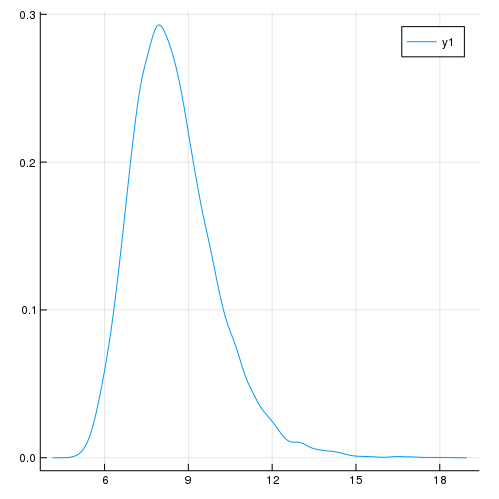

In [8]:
density(samples[:sigma])

End of `clip-21-23.jl`

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*